In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import tensorflow as tf

# Read our Average Household Income for New York State Dataset

In [2]:
Avg_Income_NYS_df = pd.read_csv('Resources/Household_Income_for_New_York_State.csv')
Avg_Income_NYS_df

,Date,US,New York
0,2021,69717,74314
1,2020,70877,76630
2,2019,69638,76416
3,2018,66828,73201
4,2017,66687,71725
5,2016,65052,71026
6,2015,63784,69587
7,2014,61468,67449
8,2013,60869,66833
9,2012,60732,66734


In [3]:
# We want to check the data types in our dataset
Avg_Income_NYS_df.dtypes

Date        int64
US          int64
New York    int64
dtype: object

In [4]:
#Our dataset formatted looks like this
#let's sort values by year ascending
Avg_Income_NYS_df= Avg_Income_NYS_df.sort_values(by='Date', ascending=True)
#we will reset the index
Avg_Income_NYS_df.reset_index(drop=True, inplace=True)
Avg_Income_NYS_df

,Date,US,New York
0,2005,64310,68813
1,2006,65267,69218
2,2007,66465,70099
3,2008,65632,70683
4,2009,63573,69191
5,2010,62323,67431
6,2011,60969,66696
7,2012,60732,66734
8,2013,60869,66833
9,2014,61468,67449


In [5]:
# We are going to rename all our columns from Date, US, New York to Year, Income_US and Income_NYS
Avg_Income_NYS_df.rename(columns={'Date': 'Year','US': 'Income_US','New York': 'Income_NYS' }, inplace=True)
Avg_Income_NYS_df

,Year,Income_US,Income_NYS
0,2005,64310,68813
1,2006,65267,69218
2,2007,66465,70099
3,2008,65632,70683
4,2009,63573,69191
5,2010,62323,67431
6,2011,60969,66696
7,2012,60732,66734
8,2013,60869,66833
9,2014,61468,67449


# From our initial analyis for the electric vehicles on the road accross the State, we will use the 2015-2021  as the period of our scrutiny

In [6]:
# We will then filter our Average income dataset accordingly
Avg_Income_NYS_2015_2021_df=Avg_Income_NYS_df[Avg_Income_NYS_df['Year']>= 2015]
Avg_Income_NYS_2015_2021_df

,Year,Income_US,Income_NYS
10,2015,63784,69587
11,2016,65052,71026
12,2017,66687,71725
13,2018,66828,73201
14,2019,69638,76416
15,2020,70877,76630
16,2021,69717,74314


In [7]:
# We want to check the data types in our dataset
Avg_Income_NYS_df.dtypes

Year          int64
Income_US     int64
Income_NYS    int64
dtype: object

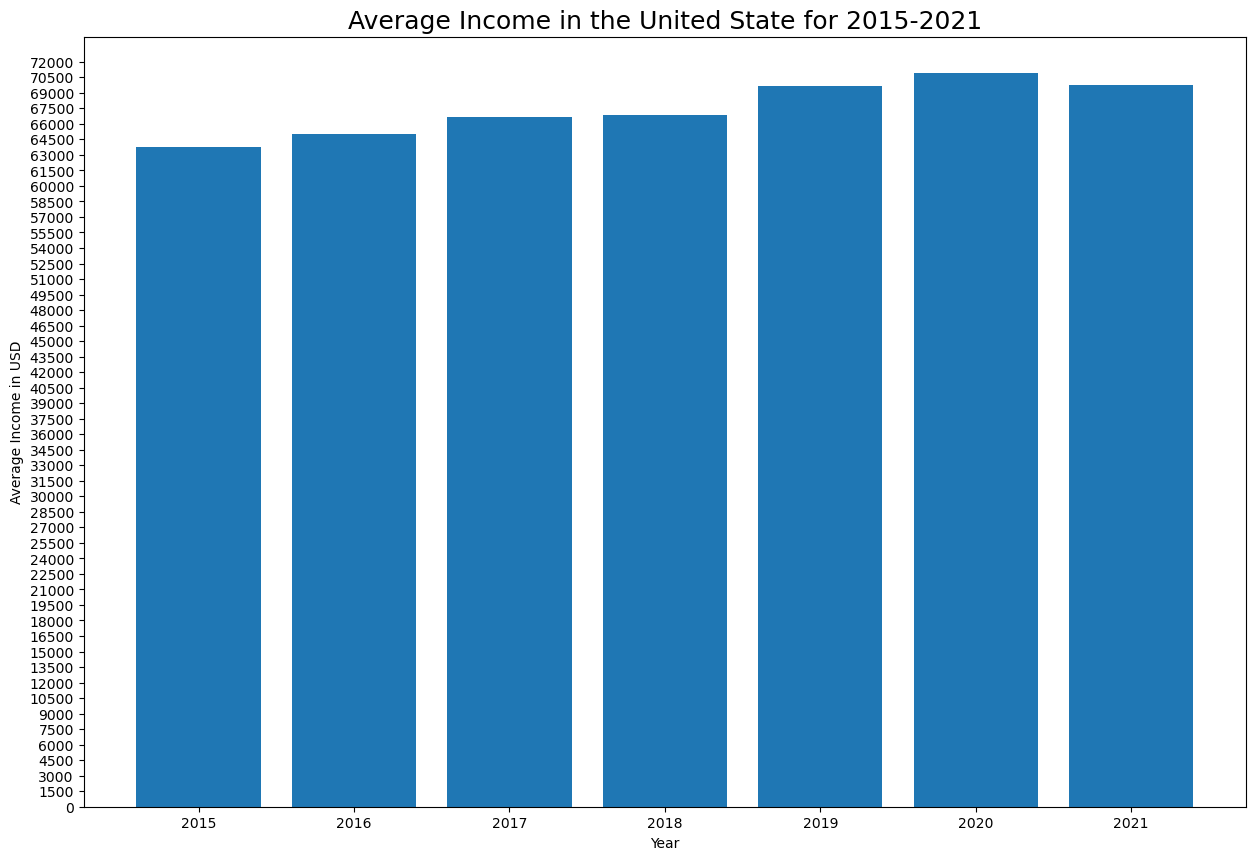

In [8]:
# Create bar chart for the US incomes
Year=Avg_Income_NYS_2015_2021_df['Year']
Income_US= Avg_Income_NYS_2015_2021_df['Income_US']
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(Year,Income_US)

ax.set_xlabel('Year')
ax.set_yticks(range(0,73000,1500))
ax.set_ylabel('Average Income in USD')
ax.set_title('Average Income in the United State for 2015-2021',fontsize=18)
plt.savefig('Images/Average Income in the United State.png', facecolor='white');

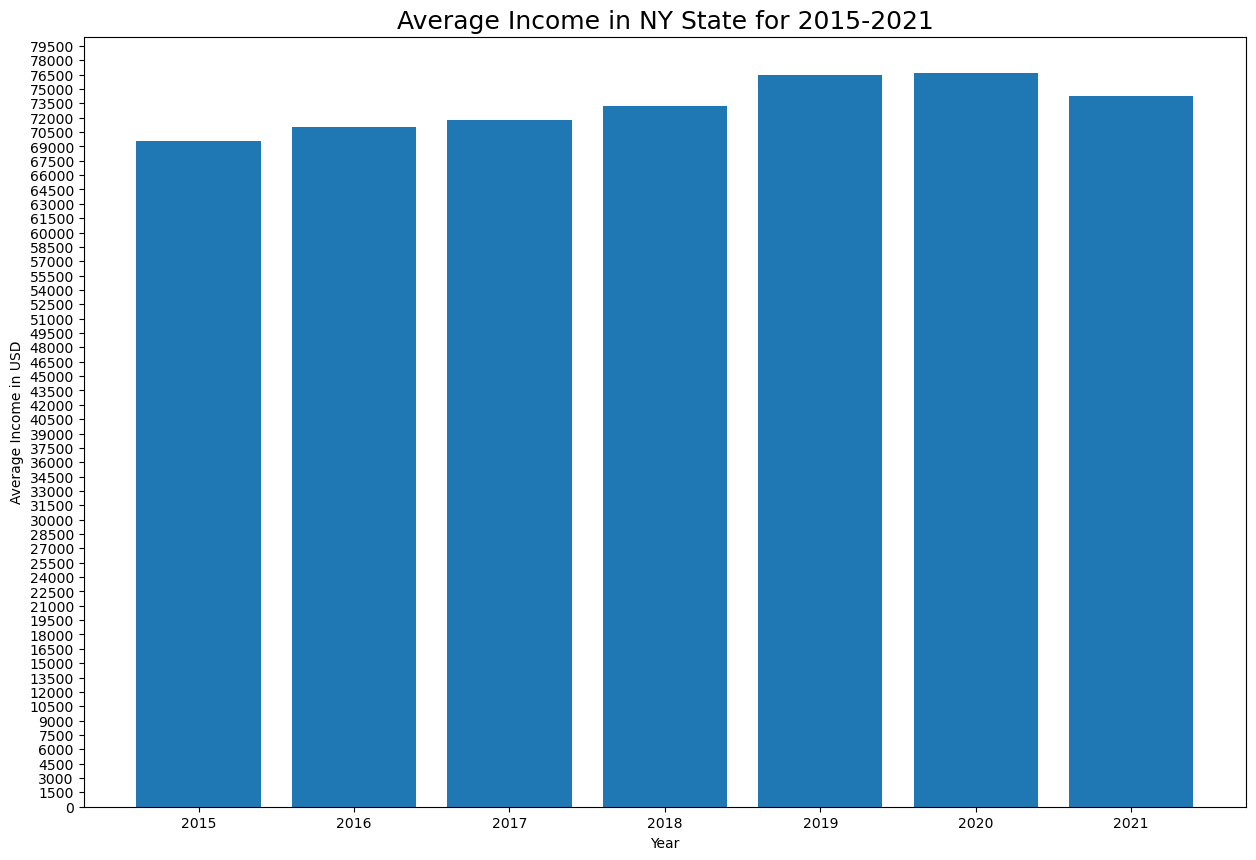

In [9]:
# Create bar chart for the NY State income
# Create bar chart for the US income
Year=Avg_Income_NYS_2015_2021_df['Year']
Income_NYS= Avg_Income_NYS_2015_2021_df['Income_NYS']
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(Year,Income_NYS)

ax.set_xlabel('Year')
ax.set_yticks(range(0,80000,1500))
ax.set_ylabel('Average Income in USD')
ax.set_title('Average Income in NY State for 2015-2021',fontsize=18)
plt.savefig('Images/Average Income in NY State.png', facecolor='white');

# 2020 was a good year .

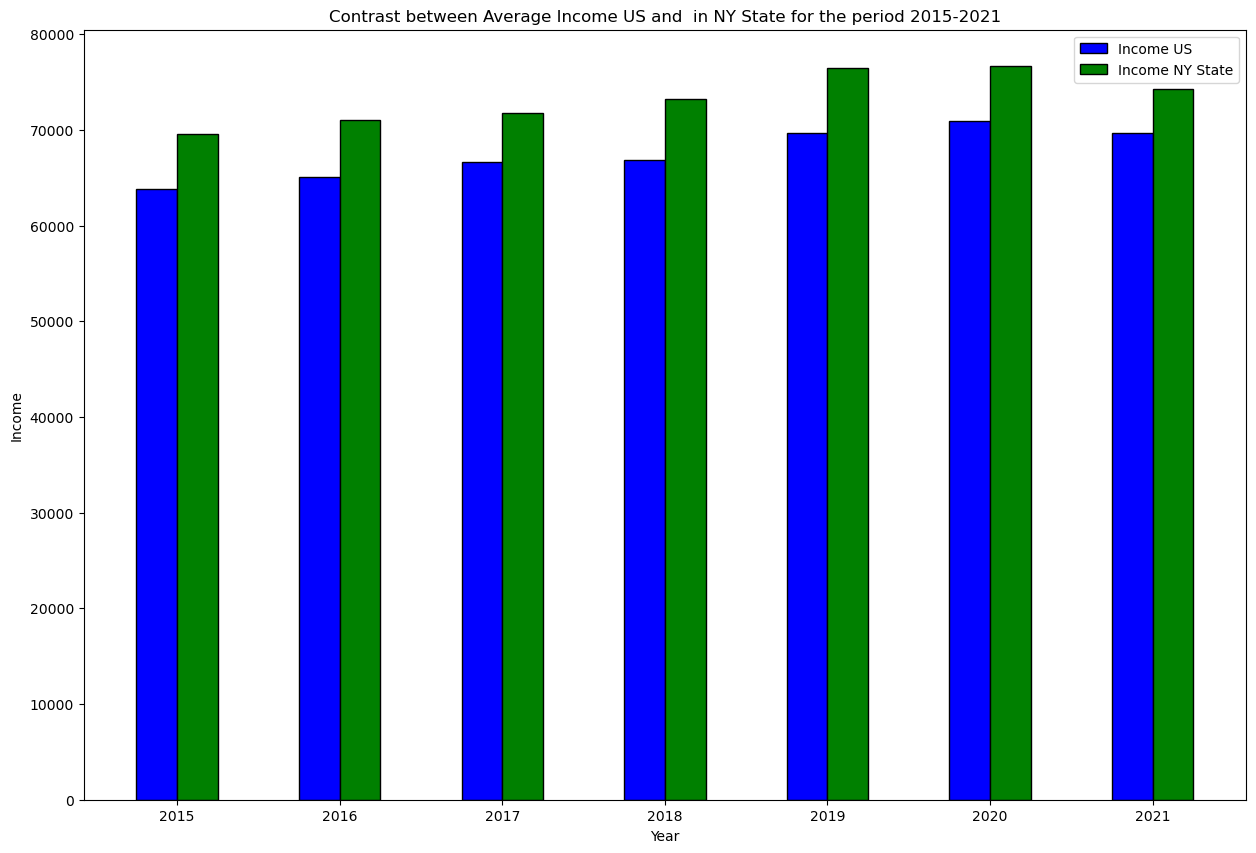

In [10]:
# Let's do a multiple bar plot to compare the trend between the income accross the US and NY State
Year=Avg_Income_NYS_2015_2021_df['Year'].sort_values(ascending=True)
Income_NYS= Avg_Income_NYS_2015_2021_df['Income_NYS']
Income_US= Avg_Income_NYS_2015_2021_df['Income_US']
f, ax = plt.subplots(figsize=(15,10))
n=7
r = np.arange(n)
width = 0.25

plt.bar(r, Income_US,color = 'b',
        width = width, edgecolor = 'black', label = 'Income US')

plt.bar(r + width, Income_NYS, color = 'g',
        width = width, edgecolor = 'black' , label = 'Income NY State')

plt.xlabel("Year")
plt.ylabel("Income")
plt.title("Contrast between Average Income US and  in NY State for the period 2015-2021")
plt.xticks(r + width/2, Year)

plt.legend()
plt.savefig('Images/Contrast between Average Income US and  in NY State.png', facecolor='white');

In [11]:
# Saving Average Income clean dataset clean data to CSV
Avg_Income_NYS_2015_2021_df.to_csv('Resources/Average_Incomes_per_Year.csv')

# Read our Population for New York State Dataset

In [12]:
Population_NYS_df = pd.read_csv('Resources/Annual_Population_Estimates_for_New_York_State_and_Counties__Beginning_1970 (1).csv')
Population_NYS_df

,FIPS Code,Geography,Year,Program Type,Population
0,36000,New York State,2021,Postcensal Population Estimate,19835913
1,36001,Albany County,2021,Postcensal Population Estimate,313743
2,36003,Allegany County,2021,Postcensal Population Estimate,46106
3,36005,Bronx County,2021,Postcensal Population Estimate,1424948
4,36007,Broome County,2021,Postcensal Population Estimate,197240
...,...,...,...,...,...
3649,36115,Washington County,1970,Intercensal Population Estimate,52938
3650,36117,Wayne County,1970,Intercensal Population Estimate,79703
3651,36119,Westchester County,1970,Intercensal Population Estimate,894227
3652,36121,Wyoming County,1970,Intercensal Population Estimate,38000


In [13]:
#population columns
Population_NYS_df.columns

Index(['FIPS Code', 'Geography', 'Year', 'Program Type', 'Population'], dtype='object')

In [14]:
# let's rename the column Geography to County
Population_NYS_df.rename(columns = {'Geography':'County'}, inplace=True)

In [15]:
#let's check if it works
Population_NYS_df.columns

Index(['FIPS Code', 'County', 'Year', 'Program Type', 'Population'], dtype='object')

In [16]:
# For the purpose of our analysis we want Population for the period 2015-2021
Population_NYS_df=Population_NYS_df[Population_NYS_df['Year']>=2015]
Population_NYS_df

,FIPS Code,County,Year,Program Type,Population
0,36000,New York State,2021,Postcensal Population Estimate,19835913
1,36001,Albany County,2021,Postcensal Population Estimate,313743
2,36003,Allegany County,2021,Postcensal Population Estimate,46106
3,36005,Bronx County,2021,Postcensal Population Estimate,1424948
4,36007,Broome County,2021,Postcensal Population Estimate,197240
...,...,...,...,...,...
499,36115,Washington County,2015,Postcensal Population Estimate,62277
500,36117,Wayne County,2015,Postcensal Population Estimate,91316
501,36119,Westchester County,2015,Postcensal Population Estimate,968891
502,36121,Wyoming County,2015,Postcensal Population Estimate,40939


In [17]:
# we aree not going to need the FIPS code and the program type for our analysis 
#FIPS codes are numbers which uniquely identify geographic areas and program Type is just not relevant for the analysis
drop_cols = ['FIPS Code', 'Program Type']
Population_NYS_df.drop(drop_cols, axis=1, inplace=True)
Population_NYS_df.head(10)

C:\Users\simro\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,County,Year,Population
0,New York State,2021,19835913
1,Albany County,2021,313743
2,Allegany County,2021,46106
3,Bronx County,2021,1424948
4,Broome County,2021,197240
5,Cattaraugus County,2021,76426
6,Cayuga County,2021,75880
7,Chautauqua County,2021,126807
8,Chemung County,2021,83045
9,Chenango County,2021,46537


# Looking for duplicates

In [18]:
duplicates_Pop = Population_NYS_df[Population_NYS_df.duplicated()]
duplicates_Pop.count()

County        0
Year          0
Population    0
dtype: int64

# Addressing potential Nulls Values

In [19]:
Population_NYS_df.isna().sum()

County        0
Year          0
Population    0
dtype: int64

In [20]:
Population_NYS_df['County'].unique()

array(['New York State', 'Albany County', 'Allegany County',
       'Bronx County', 'Broome County', 'Cattaraugus County',
       'Cayuga County', 'Chautauqua County', 'Chemung County',
       'Chenango County', 'Clinton County', 'Columbia County',
       'Cortland County', 'Delaware County', 'Dutchess County',
       'Erie County', 'Essex County', 'Franklin County', 'Fulton County',
       'Genesee County', 'Greene County', 'Hamilton County',
       'Herkimer County', 'Jefferson County', 'Kings County',
       'Lewis County', 'Livingston County', 'Madison County',
       'Monroe County', 'Montgomery County', 'Nassau County',
       'New York County', 'Niagara County', 'Oneida County',
       'Onondaga County', 'Ontario County', 'Orange County',
       'Orleans County', 'Oswego County', 'Otsego County',
       'Putnam County', 'Queens County', 'Rensselaer County',
       'Richmond County', 'Rockland County', 'St. Lawrence County',
       'Saratoga County', 'Schenectady County', 'Schoha

In [21]:
# We need to drop the row that include New York state  as it's the total given in the dataset or we want by county.
Population_NYS_df= Population_NYS_df.loc[Population_NYS_df['County'] != 'New York State']
Population_NYS_df

,County,Year,Population
1,Albany County,2021,313743
2,Allegany County,2021,46106
3,Bronx County,2021,1424948
4,Broome County,2021,197240
5,Cattaraugus County,2021,76426
...,...,...,...
499,Washington County,2015,62277
500,Wayne County,2015,91316
501,Westchester County,2015,968891
502,Wyoming County,2015,40939


In [22]:
# Saving Population clean data by years (2015-2021) clean dataset clean data to CSV
Population_NYS_df.to_csv('Resources/Population_per_Years_2015_2021.csv')

In [23]:
# Now we need to merge 2 datasets Income and Population
#let's look at the Income
Avg_Income_NYS_2015_2021_df

,Year,Income_US,Income_NYS
10,2015,63784,69587
11,2016,65052,71026
12,2017,66687,71725
13,2018,66828,73201
14,2019,69638,76416
15,2020,70877,76630
16,2021,69717,74314


In [24]:
#let's merge the 2 columns

Income_and_Population_df= pd.merge(Population_NYS_df,Avg_Income_NYS_2015_2021_df, on='Year')
Income_and_Population_df

,County,Year,Population,Income_US,Income_NYS
0,Albany County,2021,313743,69717,74314
1,Allegany County,2021,46106,69717,74314
2,Bronx County,2021,1424948,69717,74314
3,Broome County,2021,197240,69717,74314
4,Cattaraugus County,2021,76426,69717,74314
...,...,...,...,...,...
491,Washington County,2015,62277,63784,69587
492,Wayne County,2015,91316,63784,69587
493,Westchester County,2015,968891,63784,69587
494,Wyoming County,2015,40939,63784,69587


In [25]:
# let's group by
Income_and_Population_df=Income_and_Population_df.groupby(['Year','County','Income_US','Income_NYS','Population'],as_index=False)['Population'].sum()
Income_and_Population_df

,Year,County,Income_US,Income_NYS,Population
0,2015,Albany County,63784,69587,307521
1,2015,Allegany County,63784,69587,47352
2,2015,Bronx County,63784,69587,1439480
3,2015,Broome County,63784,69587,195981
4,2015,Cattaraugus County,63784,69587,77941
...,...,...,...,...,...
491,2021,Washington County,69717,74314,60956
492,2021,Wayne County,69717,74314,90923
493,2021,Westchester County,69717,74314,997895
494,2021,Wyoming County,69717,74314,40491


In [26]:
# Saving Inxome and Population dataser clean data by years (2014-2021)  to CSV
Income_and_Population_df.to_csv('Resources/Income_and_Population_per_Years_2015_2021.csv')